Base code taken from https://github.com/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb

In [162]:
!pip install yfinance

In [163]:
import yfinance as yf

In [164]:
import re
import requests
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [165]:
# import datetime
stockDataObjs = []
startTime = "2016-01-01"
endTime = "2019-08-22"

'''
for stockName in ['AAPL']:
    stockObj = StockData(stockName)
    stockDataObjs.append(stockObj)


for info in stockDataObjs:
    print(info.stock)
    print(info.getPrice(startTime, endTime))
'''
AAPLStock = yf.download("AAPL", start=startTime, end=endTime)
print(AAPLStock)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  24.220581  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.613625  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  23.151516  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  22.174412  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.291664  283192000
...               ...        ...        ...        ...        ...        ...
2019-08-15  50.865002  51.285000  49.917500  50.435001  49.485004  108909600
2019-08-16  51.070000  51.790001  50.959999  51.625000  50.652576  110481600
2019-08-19  52.654999  53.182499  52.507500  52.587502  51.596954   97654400
2019-08-20  52.720001  53.337502  52.580002  52.590000  51.599407  107537200
2019-08

In [166]:
#make 'Date' a column instead of using it as index
AAPL = AAPLStock.reset_index(level=0)
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       915 non-null    datetime64[ns]
 1   Open       915 non-null    float64       
 2   High       915 non-null    float64       
 3   Low        915 non-null    float64       
 4   Close      915 non-null    float64       
 5   Adj Close  915 non-null    float64       
 6   Volume     915 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 50.2 KB


In [167]:
# Drop NULL rows
AAPL.dropna(inplace = True)
# Change Dtype of Columns
AAPL = AAPL.astype({"Volume": float})
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,915.000000,915.000000,915.000000,915.000000,915.000000,9.150000e+02
mean,38.719530,39.064333,38.400202,38.744118,37.032481,1.299260e+08
std,9.545215,9.650977,9.444527,9.543119,9.641933,5.900821e+07
min,22.500000,22.917500,22.367500,22.584999,21.009533,4.544800e+07
25%,28.821250,29.066250,28.602500,28.926250,27.103474,9.101900e+07
50%,39.625000,39.990002,39.167500,39.465000,37.884853,1.135284e+08
75%,46.299999,46.782501,45.926250,46.357500,44.709902,1.502560e+08
max,57.695000,58.367500,57.445000,58.017502,56.054832,5.334788e+08


In [168]:
csv = AAPL.to_csv('AAPL_data.csv')

AAPL.info()

#files.download('AAPL_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       915 non-null    datetime64[ns]
 1   Open       915 non-null    float64       
 2   High       915 non-null    float64       
 3   Low        915 non-null    float64       
 4   Close      915 non-null    float64       
 5   Adj Close  915 non-null    float64       
 6   Volume     915 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 50.2 KB


In [169]:
def Dataset(Data, Date):

  Train_Data = Data['Adj Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [170]:
def ModelLSTM():
    model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
    return model

def ModelCNN():
    model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv1D(200,1,input_shape=(5,1),activation = tf.nn.leaky_relu),
                                      tf.keras.layers.MaxPooling1D(1,1),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
    return model

In [171]:
model = ModelCNN()

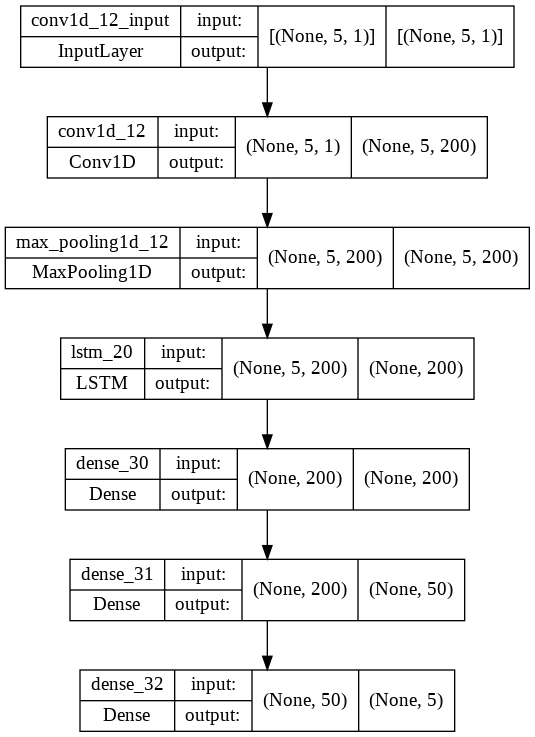

In [172]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [173]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 5, 200)            400       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 5, 200)           0         
 g1D)                                                            
                                                                 
 lstm_20 (LSTM)              (None, 200)               320800    
                                                                 
 dense_30 (Dense)            (None, 200)               40200     
                                                                 
 dense_31 (Dense)            (None, 50)                10050     
                                                                 
 dense_32 (Dense)            (None, 5)                 255       
                                                     

In [174]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

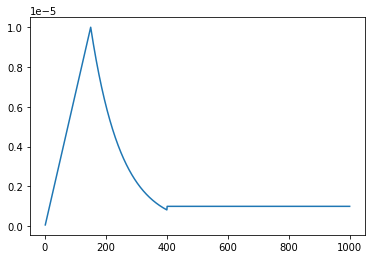

In [175]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [176]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [177]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

In [178]:
AAPL_Date = '2019-04-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

In [179]:
AAPL_Model = ModelCNN()

In [180]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [181]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 200, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 4s 143ms/step - loss: 1296.4982 - root_mean_squared_error: 36.0069 - val_loss: 2245.9644 - val_root_mean_squared_error: 47.3916 - lr: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 44ms/step - loss: 1296.4730 - root_mean_squared_error: 36.0066 - val_loss: 2245.8276 - val_root_mean_squared_error: 47.3902 - lr: 6.6667e-08
Epoch 3/200
6/6 [==============================] - 0s 37ms/step - loss: 1296.3694 - root_mean_squared_error: 36.0051 - val_loss: 2245.5593 - val_root_mean_squared_error: 47.3873 - lr: 1.3333e-07
Epoch 4/200
6/6 [==============================] - 0s 44ms/step - loss: 1296.1959 - root_mean_squared_error: 36.0027 - val_loss: 2245.1394 - val_root_mean_squared_error: 47.3829 - lr: 2.0000e-07
Epoch 5/200
6/6 [==============================] - 0s 46ms/step - loss: 1295.9409 - root_mean_squared_error: 35.9992 - val_loss: 2244.5813 - val_root_mean_squared_error: 47.3770 - lr: 2.6667e-07
Epoch 6/200
6/6 [=======

In [182]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

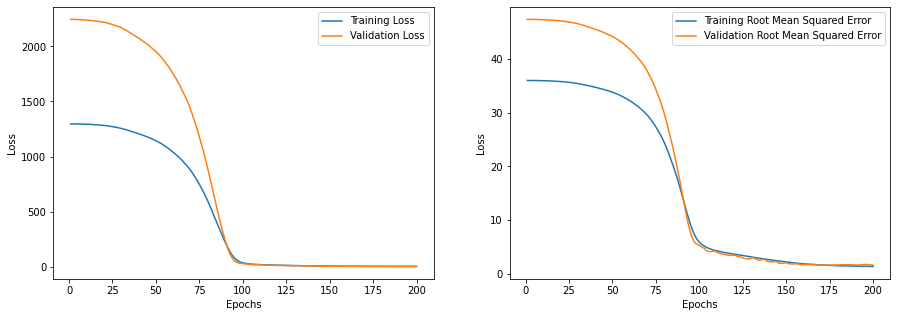

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [184]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)
AAPL_prediction.shape

(19, 5)

In [185]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.611780897646912
MAPE: 0.02765831105827823


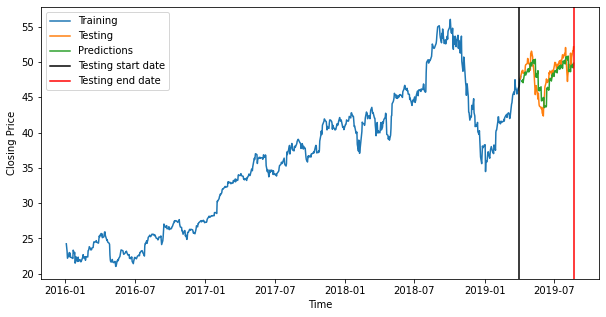

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2019-04-08'], AAPL['Adj Close'][AAPL['Date'] < '2019-04-08'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2019-04-04'], AAPL['Adj Close'][AAPL['Date'] >= '2019-04-04'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2019-04-08'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.axvline(dt.datetime(2019,4,1), label="Testing start date", color="black")
plt.axvline(dt.datetime(2019,8,22), label="Testing end date", color="red")
plt.legend(loc = 'best')